## Principal Component Analysis (PCA) on the Wisconsin Diagnostic Breast Cancer (WDBC) Dataset

---

## 1. Dataset Introduction

The **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset is a popular dataset for machine learning and statistics.  
It contains features computed from digitized images of fine needle aspirate (FNA) of breast masses, describing characteristics of the cell nuclei present in the image.

- **wdbc.data**: The main data file (no header)


**Goal:**  
Classify tumors as malignant (cancerous) or benign (non-cancerous) based on features.

---

## 2. Feature Details

Each row in `wdbc.data` represents a single patient's tumor.

- **Columns:**
  1. **ID number** (not used for ML)
  2. **Diagnosis:** M = Malignant, B = Benign
  3. **30 real-valued features** (computed for each nucleus):
      - **Radius** (mean of distances from center to points on the perimeter)
      - **Texture** (standard deviation of gray-scale values)
      - **Perimeter**
      - **Area**
      - **Smoothness** (local variation in radius lengths)
      - **Compactness** (perimeter² / area - 1.0)
      - **Concavity** (severity of concave portions)
      - **Concave points** (number of concave portions)
      - **Symmetry**
      - **Fractal dimension** ("coastline approximation" - 1)

Each of these 10 features is calculated as:
- **Mean**
- **Standard error**
- **Worst (largest) value**

**Total features:** 10 × 3 = 30 per sample.

---

In [1]:
## 3. Step-by-Step PCA in Python

### 3.1. Import Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load the Data

In [2]:
# Define column names from .names file (add as list)
col_names = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
    "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

df = pd.read_csv("wdbc.data", header=None, names=col_names)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Preprocessing

In [3]:
# Remove ID column (not useful for ML)
df = df.drop(columns=["id"])

# Convert diagnosis to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and label
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Applying PCA

In [4]:
model = PCA() # i am not defining number of components
model.fit(X_scaled)

PCA()

In [5]:
# we check proportion of information explained by components : scaled eigenvalues
model.explained_variance_ratio_ # proportion of variance that can be explained by each component, always in descending order

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [7]:
import numpy as np
np.cumsum(model.explained_variance_ratio_*100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

In [8]:
# Keep as many components as needed to explain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape after PCA: {X_pca.shape}")
print("Explained variance by components:", pca.explained_variance_ratio_)


Original shape: (569, 30)
Reduced shape after PCA: (569, 10)
Explained variance by components: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


In [9]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
pd.DataFrame(X_pca,columns=["C"+str(i) for i in range(1,11)])

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296


In [11]:
pca.components_.shape

(10, 30)

In [12]:
pd.DataFrame(pca.components_,index=["C"+str(i) for i in range(1,11)],columns=X.columns)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
C1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
C2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
C3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
C4,-0.041409,0.603050,-0.041983,-0.053434,-0.159383,-0.031795,-0.019123,-0.065336,-0.067125,-0.048587,...,-0.015417,0.632808,-0.013803,-0.025895,-0.017652,0.091328,0.073951,-0.006007,0.036251,0.077053
C5,-0.037786,0.049469,-0.037375,-0.010331,0.365089,-0.011704,-0.086375,0.043861,0.305941,0.044424,...,0.004407,0.092883,-0.007454,0.027391,0.324435,-0.121804,-0.188519,-0.043332,0.244559,-0.094423
C6,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
C7,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
C8,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
C9,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
C10,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


In [13]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualizing the Results

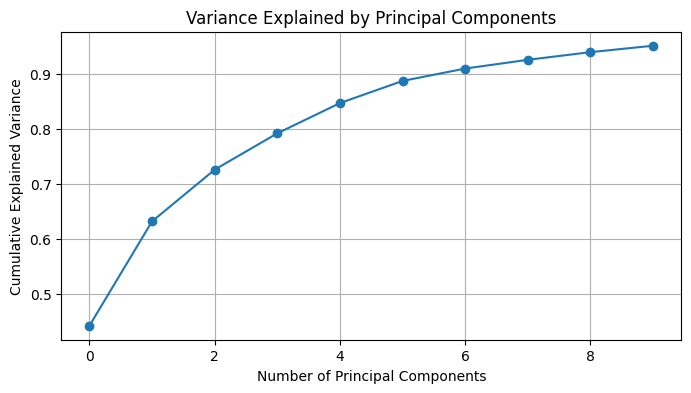

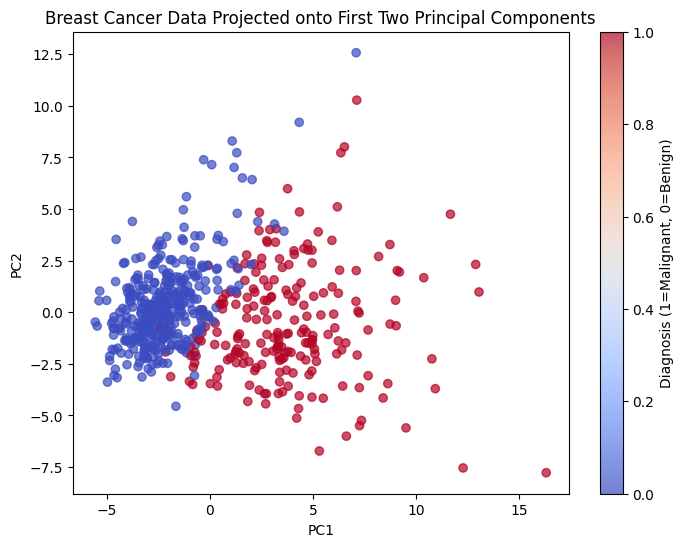

In [14]:
# Scree plot - variance explained by each component
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by Principal Components')
plt.grid()
plt.show()

# 2D Scatter plot with first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Breast Cancer Data Projected onto First Two Principal Components')
plt.colorbar(label='Diagnosis (1=Malignant, 0=Benign)')
plt.show()
